## Sample of watershed()

This code is based on [this site](https://docs.opencv.org/3.1.0/d3/db4/tutorial_py_watershed.html)

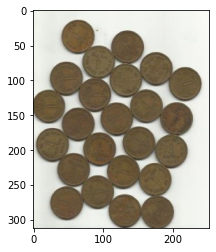

In [13]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('images/water_coins.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


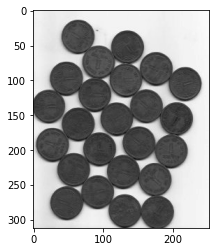

In [14]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap="gray")

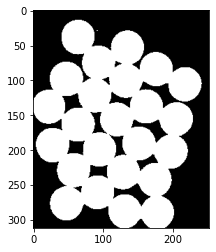

In [16]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap="gray")

In [17]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

(312, 252)


True

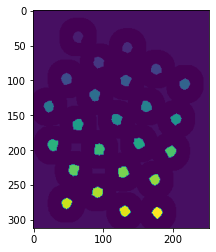

In [36]:
 # Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

print(markers.shape)

plt.imshow(markers)

cv2.imwrite('images/result_before_makers.jpg', markers)

In [27]:
afterMarkers = cv2.watershed(img,markers)
img[afterMarkers == -1] = [255,0,0]

True

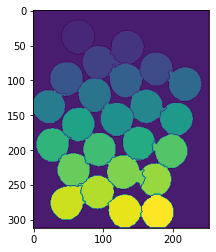

In [29]:
plt.imshow(afterMarkers)
cv2.imwrite('images/result_after_makers.jpg', afterMarkers)